# Prompt 3: Do inequities in access exacerbate disproportionate exposure to hazards?

look into doing a permutation test

cross everything in NBS and climate risk and see which ones are correlated

also, correlate "access" and "NBS"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import scipy.stats as stats
import numpy as np
import json
# import requests
import geopandas as gpd
from sklearn import preprocessing
import geopandas as gpd
from shapely.geometry import Point
import scipy.stats as stats

In [2]:
master_data = pd.read_csv("master_data.csv")


In [3]:
demographics = ['ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU', 'ACSUNEMPBAS', 'MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISO', 'LINGISOPCT', 'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'UNEMPLOYED', 'UNEMPPCT']

# Access columns Carrie identiifed 
access_cols = ["protected_fee_value", 
"trailmilesexist_value", 
"pubrecland_value", 
"bikeroutes1_2_value", 
"bikeroutes1_value", 
"watersites_existing_value", 
"parkneed_value", 
"trailmilespotential_value",
"watersites_planned_value"]
# NBS columns Carrie identified
nbs_cols = ['wetlands_value', 
'vernalpools_value', 
'naturalriver_value', 
'naturalbaylands_value', 
'hirechargevulnerable_value', 
'floodplain500_natural_value', 
'carbon_urbanforest_value', 
'drinkingwater_value', 
'reservoir_value', 
'waterbasin_value']


climate_risk_carrie = ['morewater_hotdry_value',
 'morewater_warmwet_value',
 'floodplain100_value',
 'floodplain500_value',
 'slr2050_value',
 'slr2100_value',
 'historicalfire_value',
 'wu_interface_value',
 'firehazard_value',
 'urbheatisland_air_value']

#access_cols = ["protected_fee_value", "trailmilesexist_value", "pubrecland_value", "bikeroutes1_2_value", "bikeroutes1_value", "watersites_existing_value", "parkneed_value"]
more_compare = ['communityconcern_value', 'disadvcommunity_value', 'displacement_typos_value']

'''
"impair303stream_value",
"impair303waterbody_value",
"waterqualityindex_value",
'''

pollution = [
"pollutioncancer_value",
"pollutionexposure_value"]

In [4]:
#master_data[["protected_fee_value", "Census_Tract"]]

In [5]:
master_data_normalized = master_data.copy()
for a in access_cols:
    master_data_normalized[a] = master_data[a] / master_data["acres"]
for p in pollution:
    master_data_normalized[p] = master_data[p] / master_data["acres"]

#remove boolean values as we dont want to normalize those
nbs_normalize = nbs_cols.copy()
nbs_normalize.remove('reservoir_value')
nbs_normalize.remove('waterbasin_value')

for n in nbs_normalize:
    master_data_normalized[n] = master_data[n] / master_data["acres"]

for r in climate_risk_carrie:
    master_data_normalized[r] = master_data[r] / master_data["acres"]    

for c in more_compare:
    master_data_normalized[c] = master_data[c] / master_data["acres"]    


In [6]:
master_data_normalized

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value,acres,census_tract_y
0,6001400100,11497.5,60014001001,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0,135,529,305,515,0.00000,0.000000,0.0,1718,6001400100
1,6001400200,11499.5,60014002001,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,0,0,0,0,0,0.00000,0.000000,0.0,143,6001400200
2,6001400300,11502.5,60014003002,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,0,0,0,0,0,0.00365,0.003650,0.0,274,6001400300
3,6001400400,11506.0,60014004002,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,0,0,0,0,0,1.00000,0.000000,0.0,178,6001400400
4,6001400500,11509.0,60014005002,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,0,0,0,0,0,1.00000,0.006849,0.0,146,6001400500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,60971541002,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,40900,28065,30859,0,81194,0.00000,0.000000,0.0,143346,6097154100
1751,6097154201,35587.5,60971542012,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,1752,655,56,0,1685,0.00000,0.000000,0.0,6597,6097154201
1752,6097154202,35591.5,60971542022,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,16351,17266,3606,33693,10640,0.00000,0.000000,0.0,46891,6097154202
1753,6097154304,35595.5,60971543042,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,81066,105815,20722,26840,57564,0.00000,0.000122,0.0,221362,6097154304


<AxesSubplot: >

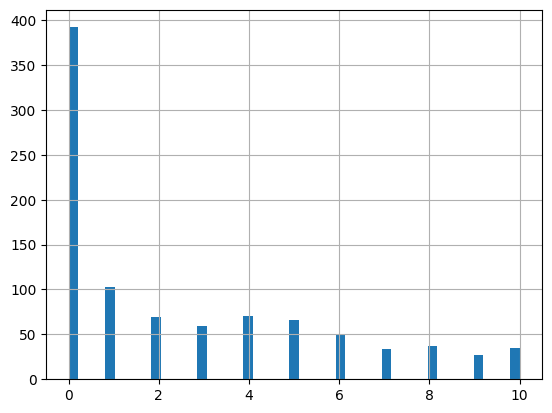

In [7]:
master_data['protected_fee_value'].hist(bins = np.linspace(0,10))

In [8]:
#Looking at the values in the columns, we decided to standardized the access columns 
master_data["protected_fee_value"].describe()

count      1755.000000
mean        548.191453
std        4179.376367
min           0.000000
25%           1.000000
50%           8.000000
75%          39.000000
max      117529.000000
Name: protected_fee_value, dtype: float64

In [9]:
#master_data["protected_fee_value norm"].hist(bins = np.linspace(0, 10))

In [10]:
#master_data["protected_fee_value norm"]

In [11]:
from sklearn.preprocessing import StandardScaler


df = master_data[nbs_cols].copy()

df_2 = master_data[access_cols].copy()

#scaler = StandardScaler()
  
# transform data
#df = scaler.fit_transform(df)
#df

scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,wetlands_value,vernalpools_value,naturalriver_value,naturalbaylands_value,hirechargevulnerable_value,floodplain500_natural_value,carbon_urbanforest_value,drinkingwater_value,reservoir_value,waterbasin_value
0,-0.080918,-0.044494,-0.127929,-0.060565,-0.185413,-0.105155,2.315219,-0.091336,-0.191367,-0.125
1,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.312196,-0.093034,-0.191367,-0.125
2,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.295162,-0.093034,-0.191367,-0.125
3,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.291423,-0.093034,-0.191367,-0.125
4,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.476474,-0.093034,-0.191367,-0.125
...,...,...,...,...,...,...,...,...,...,...
1750,-0.080918,-0.044494,8.100794,-0.060565,9.771672,2.731985,-0.166751,17.280178,5.225558,-0.125
1751,-0.080918,-0.044494,0.530527,-0.060565,1.893160,0.542755,0.392764,0.706782,-0.191367,-0.125
1752,-0.080918,-0.044494,2.239014,-0.060565,0.175298,-0.104715,0.300637,5.583408,5.225558,-0.125
1753,0.917037,-0.044494,10.648855,-0.060565,-0.185413,0.293287,-0.577880,2.858017,5.225558,-0.125


<AxesSubplot: >

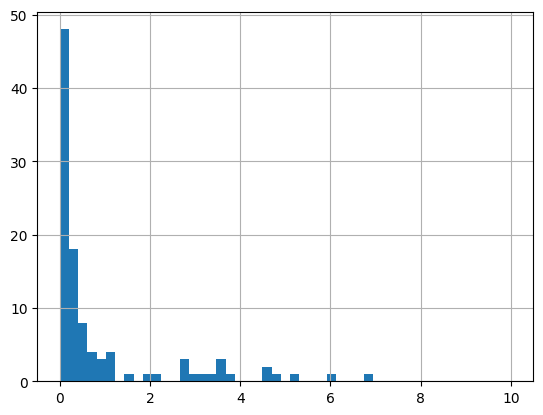

In [12]:
scaled_features_df["wetlands_value"].hist(bins = np.linspace(0, 10))

In [32]:
# function to explore the data that takes in two factors (see photo above for column names) and compares them

def exploration(data, dem_factor, nbs_factor): 
    #print(dem_factor,nbs_factor)
    #print(data[dem_factor].dtype, data[nbs_factor].dtype)
    corr = np.corrcoef(data[dem_factor], data[nbs_factor])[0][1]
    if (corr >= 0.2 or corr <= -0.2):
        print(f"Correlation between {dem_factor} and {nbs_factor}: ", corr) 

        # plt.subplot(2, 1, 1)
        # plt.plot(x1, y1, 'ko-')
        # plt.title('A tale of 2 subplots')
        # plt.ylabel('Damped oscillation')


        # plt.subplot(2, 1, 2)
        # plt.plot(x2, y2, 'r.-')
        # plt.xlabel('time (s)')
        # plt.ylabel('Undamped') 

        #x_limits = find_outliers(data, dem_factor)
        #y_limits = find_outliers(data, nbs_factor)
            
        #scatter_plot = sns.jointplot(data=data, x=dem_factor, y=nbs_factor, kind="reg", scatter_kws={'s':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))
        #scatter_plot.fig.suptitle(f"Scatter plot of {dem_factor} vs {nbs_factor}")
        

        return corr  
    else:
        return


In [14]:
def find_outliers(data, variable): 
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a copy of the original dataframe with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    iqr = data[variable].describe().get('75%') - data[variable].describe().get('25%')
    upper = data[variable].describe().get('75%') + (1.5 * iqr)
    lower = data[variable].describe().get('25%') - (1.5 * iqr)
    return [lower, upper]

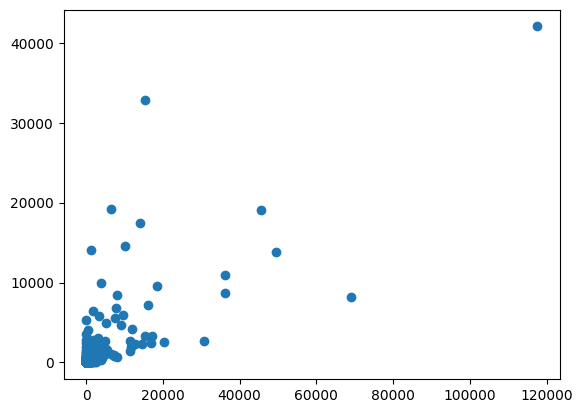

In [15]:
plt.scatter(master_data["protected_fee_value"], master_data["naturalriver_value"])

In [16]:
'''factor_1 = "protected_fee_value"
factor_2 = "naturalriver_value"
x_limits = find_outliers(master_data, factor_1)
y_limits = find_outliers(master_data, factor_2)
            
scatter_plot = sns.jointplot(data=master_data, x=factor_1, y=factor_2, kind="reg", scatter_kws={'s':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))
scatter_plot.fig.suptitle(f"Scatter plot of {factor_1} vs {factor_2}")'''

'factor_1 = "protected_fee_value"\nfactor_2 = "naturalriver_value"\nx_limits = find_outliers(master_data, factor_1)\ny_limits = find_outliers(master_data, factor_2)\n            \nscatter_plot = sns.jointplot(data=master_data, x=factor_1, y=factor_2, kind="reg", scatter_kws={\'s\':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))\nscatter_plot.fig.suptitle(f"Scatter plot of {factor_1} vs {factor_2}")'

In [17]:
factor_1 = "protected_fee_value"
factor_2 = "drinkingwater_value"
#x_limits = find_outliers(master_data, factor_1)
#y_limits = find_outliers(master_data, factor_2)
            
#scatter_plot = sns.jointplot(data=master_data, x=factor_1, y=factor_2, kind="reg")

In [18]:
for access in access_cols:
    for risk in climate_risk_carrie:
        exploration(master_data_normalized, access, risk)

Correlation between protected_fee_value and morewater_hotdry_value:  0.28575542846735846
Correlation between protected_fee_value and morewater_warmwet_value:  0.31838070579091493
Correlation between protected_fee_value and firehazard_value:  0.43925501113387405
Correlation between protected_fee_value and urbheatisland_air_value:  -0.48864371438808757
Correlation between trailmilesexist_value and slr2050_value:  0.20747763337646563
Correlation between trailmilesexist_value and slr2100_value:  0.2811727999112397
Correlation between pubrecland_value and morewater_hotdry_value:  0.21061489609754008
Correlation between pubrecland_value and morewater_warmwet_value:  0.2528981569697795
Correlation between pubrecland_value and firehazard_value:  0.4037271628019809
Correlation between pubrecland_value and urbheatisland_air_value:  -0.4505503690483666
Correlation between bikeroutes1_2_value and morewater_hotdry_value:  -0.16635370495148089
Correlation between bikeroutes1_2_value and morewater_wa

In [19]:
for access in access_cols:
    for pol in pollution:
        exploration(master_data_normalized, access, pol)

Correlation between protected_fee_value and pollutioncancer_value:  -0.10975819740019394
Correlation between protected_fee_value and pollutionexposure_value:  -0.1363487624605173
Correlation between pubrecland_value and pollutioncancer_value:  -0.10333504906715928
Correlation between pubrecland_value and pollutionexposure_value:  -0.12740702562947653
Correlation between parkneed_value and pollutionexposure_value:  -0.10779610630706353


In [20]:
for access in access_cols:
    for dem in demographics:
        exploration(master_data_normalized, access, dem)

Correlation between protected_fee_value and MINORPCT:  -0.18237643966618755
Correlation between protected_fee_value and LOWINCPCT:  -0.1352333475774945
Correlation between protected_fee_value and LESSHSPCT:  -0.11994641802903855
Correlation between protected_fee_value and LINGISO:  -0.12687809419890111
Correlation between protected_fee_value and LINGISOPCT:  -0.12876609129931343
Correlation between protected_fee_value and OVER64:  0.21487669154636135
Correlation between protected_fee_value and OVER64PCT:  0.20962550601621693
Correlation between pubrecland_value and MINORPCT:  -0.1810673479072099
Correlation between pubrecland_value and LOWINCPCT:  -0.12643276767194145
Correlation between pubrecland_value and LESSHSPCT:  -0.11433674175597458
Correlation between pubrecland_value and LINGISO:  -0.11637783260604649
Correlation between pubrecland_value and LINGISOPCT:  -0.11582584903146506
Correlation between pubrecland_value and OVER64PCT:  0.21269813777315322
Correlation between bikeroute

In [33]:
for risk in climate_risk_carrie:
    for pol in pollution:
        exploration(master_data_normalized, access, pol)

In [34]:
for risk in climate_risk_carrie:
    for pol in pollution:
        exploration(master_data_normalized, risk, pol)

Correlation between urbheatisland_air_value and pollutioncancer_value:  0.2528894707748654
Correlation between urbheatisland_air_value and pollutionexposure_value:  0.3402595963530889


In [35]:
for nbs in nbs_cols:
    for pol in pollution:
        exploration(master_data_normalized, nbs, pol)

In [27]:
for nbs in nbs_cols:
    for risk in climate_risk_carrie:
        exploration(master_data_normalized, nbs, risk)

Correlation between wetlands_value and floodplain100_value:  0.5424906834005327
Correlation between wetlands_value and slr2050_value:  0.711411961978762
Correlation between wetlands_value and slr2100_value:  0.4763564528364074
Correlation between naturalriver_value and morewater_hotdry_value:  0.694906118937068
Correlation between naturalriver_value and morewater_warmwet_value:  0.6454538208035587
Correlation between naturalriver_value and firehazard_value:  0.3147771559535487
Correlation between naturalriver_value and urbheatisland_air_value:  -0.5241712006740773
Correlation between naturalbaylands_value and floodplain100_value:  0.5392518486812702
Correlation between naturalbaylands_value and slr2050_value:  0.7178501929485464
Correlation between naturalbaylands_value and slr2100_value:  0.45817901287303564
Correlation between floodplain500_natural_value and floodplain100_value:  0.6486653164292554
Correlation between floodplain500_natural_value and floodplain500_value:  0.3560557948

In [22]:
calenviro = pd.read_excel(io = "calenviroscreen40resultsdatadictionary_F_2021.xlsx", sheet_name = 'CES4.0FINAL_results')
bay_area_counties = ['Marin', 'San Mateo', 'Napa', 'Contra Costa', 'Santa Clara', 'Alameda', 'Sonoma', 'San Francisco', 'Solano']
#calenviro = calenviro.iloc[:,[0,1,2,3,7,8,9]]  i just commented this out bc I don't understand it and it was erroring me trying to filter for bay area counties 
calenviro = calenviro[calenviro["California County"].isin(bay_area_counties)]
our_scores = pd.read_csv("/work/bay_area_tracts_cleaned.csv")
nbs_cols = ["wetlands_value", "vernalpools_value", "naturalriver_value", "naturalbaylands_value", "hirechargevulnerable_value", "floodplain500_natural_value", "carbon_urbanforest_value", "drinkingwater_value"]
our_scores_nbs = our_scores[["wetlands_value", "vernalpools_value", "naturalriver_value", "naturalbaylands_value", "hirechargevulnerable_value", "floodplain500_natural_value", "carbon_urbanforest_value", "drinkingwater_value"]]
totals = our_scores[nbs_cols].sum(axis=1)
d = {"census_tract":our_scores['census_tract'], "Total":totals}
tract_scores = pd.DataFrame(data=d)
tract_scores["NBS Score"] = tract_scores.apply(lambda x: stats.percentileofscore(tract_scores["Total"], x["Total"]), axis =1)
tract_scores["NBS Score"] = 100 - tract_scores["NBS Score"]
all_merged = calenviro.merge(tract_scores, left_on = 'Census Tract', right_on = 'census_tract')
all_merged['highest_combined'] = all_merged[' CES 4.0 Percentile'] + all_merged['NBS Score']

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [90]:
#all_merged

In [85]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df = all_merged[['Longitude', 'Latitude', 'highest_combined']]

ca = gpd.read_file('/work/Bay Area Counties.zip')

                        geometry
0    POINT (-122.38440 37.95947)
1    POINT (-121.86960 38.01523)
2    POINT (-122.36243 37.94102)
3    POINT (-122.32300 37.91599)
4    POINT (-122.35674 37.92832)
..                           ...
801  POINT (-122.50283 37.78607)
802  POINT (-122.49209 37.76840)
803  POINT (-122.38948 37.74629)
804  POINT (-122.37686 37.61476)
805  POINT (-122.17722 37.42926)

[806 rows x 1 columns]


ValueError: The dataframe and given column have different number of rows.

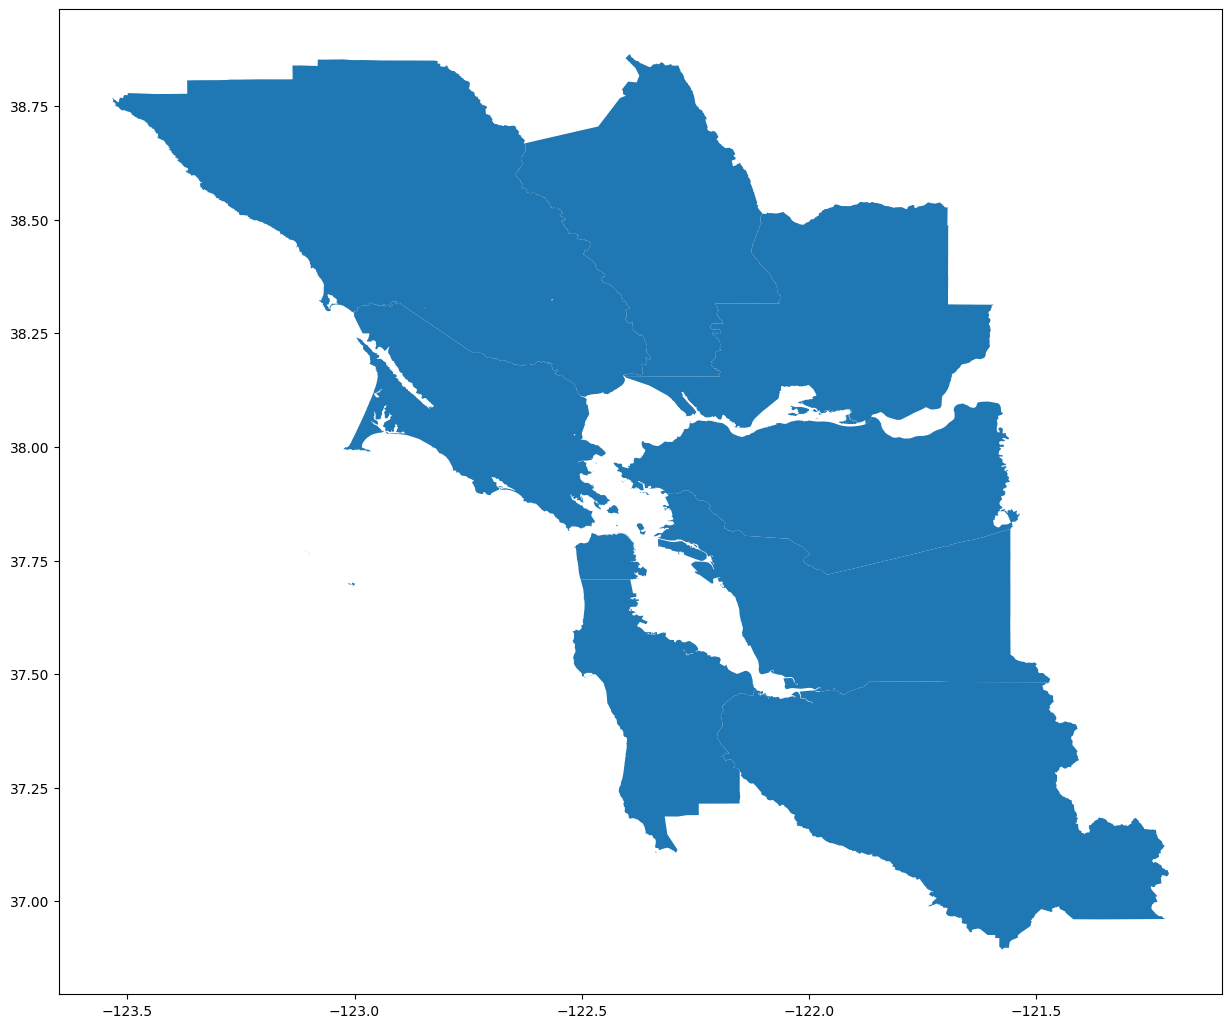

In [91]:
lo=all_merged['Longitude'].tolist()
la=all_merged['Latitude'].tolist()

#us = world.query('name == "United States of America"')
fig,ax = plt.subplots(figsize = (15,15))
ca.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, label = 'CA', column=master_data_normalized['MINORPCT'], legend=True)
plt.show()

In [19]:
master_data["waterqualityindex_value"]

0        lower than average
1        lower than average
2        lower than average
3        lower than average
4        lower than average
               ...         
1750    higher than average
1751     lower than average
1752    higher than average
1753    higher than average
1754    higher than average
Name: waterqualityindex_value, Length: 1755, dtype: object

In [79]:
#master_data

In [21]:
calenviro = pd.read_excel(io = "calenviroscreen40resultsdatadictionary_F_2021.xlsx", sheet_name = 'CES4.0FINAL_results')
calenviro_filtered = calenviro[['Census Tract', 'California County', 'Approximate Location']]
master_with_county = calenviro_filtered.merge(master_data, left_on='Census Tract', right_on='Census_Tract').drop(columns=['Census Tract'])
master_with_county.head()

,California County,Approximate Location,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value,acres,census_tract_y
0,Solano,Vallejo,6095250701,34936.5,60952507011,9.0,1833.500000,1805.500000,1290.500000,592.500000,...,0,0,0,0,0,601,687,680,691,6095250701
1,Alameda,Oakland,6001407300,11737.5,60014073001,9.0,1230.500000,1230.500000,817.500000,333.500000,...,0,0,0,0,0,588,638,639,639,6001407300
2,Alameda,Oakland,6001409000,11799.0,60014090002,9.0,1585.333333,1558.666667,946.666667,353.333333,...,0,6,0,0,0,3771,4569,4336,4581,6001409000
3,Alameda,Oakland,6001408800,11793.5,60014088002,9.0,1655.500000,1655.500000,943.750000,528.500000,...,0,0,0,0,0,293,293,291,293,6001408800
4,Contra Costa,North Richmond,6013365002,13498.0,60133650022,9.0,1807.333333,1807.333333,1121.666667,467.333333,...,0,213,142,0,0,1429,1506,1194,1526,6013365002


In [22]:
master_with_county['California County'].value_counts()

Alameda          342
Santa Clara      334
Contra Costa     174
San Francisco    156
San Mateo        140
Solano            92
Sonoma            77
Marin             47
Napa              38
Name: California County, dtype: int64

In [23]:
def exploration(data, dem_factor, nbs_factor): 
    corr = np.corrcoef(data[dem_factor], data[nbs_factor])[0][1]
    if (corr >= 0.2 or corr <= -0.2):
        print(f"Correlation between {dem_factor} and {nbs_factor}: ", corr) 
        #x_limits = find_outliers(data, dem_factor)
        #y_limits = find_outliers(data, nbs_factor)
        
        #scatter_plot = sns.jointplot(data=data, x=dem_factor, y=nbs_factor, kind="reg", scatter_kws={'s':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))
        #scatter_plot.fig.suptitle(f"Scatter plot of {dem_factor} vs {nbs_factor}")
        return corr  
    else:
        return

bay_area_counties = ['Alameda','Santa Clara ','Contra Costa ','San Francisco ','San Mateo ','Solano ','Sonoma ','Marin ','Napa ']     

for county in bay_area_counties:
    tbl = master_with_county[master_with_county['California County'] == county]
    print(county)
    for access in access_cols:
        for pol in pollution:
            exploration(tbl, access, pol)

Alameda
Santa Clara 
Contra Costa 
San Francisco 
San Mateo 
Solano 
Correlation between bikeroutes1_value and pollutioncancer_value:  0.21318599623896195
Sonoma 
Marin 
Correlation between bikeroutes1_value and pollutioncancer_value:  0.2850604584269637
Correlation between bikeroutes1_value and pollutionexposure_value:  0.26828114076734466
Correlation between watersites_existing_value and pollutioncancer_value:  0.2538488525907655
Correlation between watersites_existing_value and pollutionexposure_value:  0.38793583681055704
Napa 
Correlation between trailmilesexist_value and pollutioncancer_value:  0.34423329686244664
Correlation between trailmilesexist_value and pollutionexposure_value:  0.43152025723058485
Correlation between bikeroutes1_value and pollutioncancer_value:  0.5543980275631604
Correlation between bikeroutes1_value and pollutionexposure_value:  0.4624216904149443
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean o

In [24]:
master_data

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value,acres,census_tract_y
0,6001400100,11497.5,60014001001,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0,135,529,305,515,0,0,0,1718,6001400100
1,6001400200,11499.5,60014002001,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,0,0,0,0,0,0,0,0,143,6001400200
2,6001400300,11502.5,60014003002,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,0,0,0,0,0,1,1,0,274,6001400300
3,6001400400,11506.0,60014004002,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,0,0,0,0,0,178,0,0,178,6001400400
4,6001400500,11509.0,60014005002,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,0,0,0,0,0,146,1,0,146,6001400500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,60971541002,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,40900,28065,30859,0,81194,0,0,0,143346,6097154100
1751,6097154201,35587.5,60971542012,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,1752,655,56,0,1685,0,0,0,6597,6097154201
1752,6097154202,35591.5,60971542022,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,16351,17266,3606,33693,10640,0,0,0,46891,6097154202
1753,6097154304,35595.5,60971543042,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,81066,105815,20722,26840,57564,0,27,0,221362,6097154304


In [25]:
master_with_county[master_with_county['California County'] == 'Marin '][['pollutioncancer_value', 'pollutionexposure_value']]

,pollutioncancer_value,pollutionexposure_value
128,31,111
314,9,19
480,10,51
529,8,53
586,0,8
590,0,11
694,79,17
699,7,13
812,3,21
916,0,0


In [26]:
master_with_county[more_compare]

,communityconcern_value,disadvcommunity_value,displacement_typos_value
0,687,680,601
1,638,639,588
2,4569,4336,3771
3,293,291,293
4,1506,1194,1429
...,...,...,...
1395,0,0,0
1396,4,6,1
1397,624,0,0
1398,0,0,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08c08e4f-c970-41e1-98db-afa3328b10c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>